# IMDB DATA ANALYSIS

Here I will do a quick analysis of the IMDB dataset. IMDB is an online database of information related to films, television programs, home videos, video games and so on. The database stores information such as:  cast, production crew, personal biographies, plot summaries, trivia, fan and critical reviews, movie genres and ratings.

Ratings consist of a weighted average of all the individual votes. Individuals can vote on the movies, giving a score of 1-10.

In this analysis I will focus only on movies, and on information like genres ratings and year. Some questions that I am interested about are: What is the average rating per movie genre? and per decade? 


Lets start by downloading and saving the IMDB dataset in our computer. The following code will check if the files are on the script directory, and if they arent it will proceed to download the files.

In [1]:
import requests
import pandas as pd
import gzip
from pathlib import Path

def down_save(name):
    """ Downloads imdb datasets and saves them in the script path
     
    Args:
        name(str): Accepts either "ratings" or "basics" and downloads said dataset
    """
    if name == "ratings":
        url = "https://datasets.imdbws.com/title.ratings.tsv.gz"
        response = requests.get(url, allow_redirects=True)
        with open('title.ratings.tsv.gz', 'wb') as f:
            f.write(response.content)
    if name == "basics":
        url = "https://datasets.imdbws.com/title.basics.tsv.gz"
        response = requests.get(url, allow_redirects=True)
        with open('title.basics.tsv.gz', 'wb') as f:
            f.write(response.content)
    
def check():
    """ Checks if the IMDB dataset is on the CWD 

    """
    print("\nChecking if title.ratings.tsv.gz is on the current working directory...\n") 
    
    if Path('title.ratings.tsv.gz').is_file():
        print ("Ok")
    else:
        print ("File doesnt exist\n\nDownloading file ....\n")
        down_save("ratings")  
        print ("\nFile saved as title.ratings.tsv.gz on the cwd" )
        
    print("\nChecking if title.basics.tsv.gz is on the current working directory...\n")   
    
    if Path('title.basics.tsv.gz').is_file():
        print ("Ok")
    else:
        print ("File doesnt exist\n\nDownloading file ....\n")
        down_save("basics")
        print ("\nFile saved as title.basics.tsv.gz on the cwd" )


check()

#Opening the files and saving them as 'imdb_ratings' and 'imdb_basics'.

with gzip.open('title.ratings.tsv.gz', 'rb') as f:
    imdb_ratings=pd.read_csv(f,delimiter='\t',encoding='utf-8',na_values=[r'\N'])
    
with gzip.open('title.basics.tsv.gz', 'rb') as f:
    imdb_basics=pd.read_csv(f,delimiter='\t',encoding='utf-8',na_values=[r'\N'])
    


Checking if title.ratings.tsv.gz is on the current working directory...

Ok

Checking if title.basics.tsv.gz is on the current working directory...

Ok


C:\Users\juanv\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
imdb_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,NaN,1,"Comedy,Short"


In [3]:
imdb_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1585
1,tt0000002,6.1,192
2,tt0000003,6.5,1248
3,tt0000004,6.2,119
4,tt0000005,6.1,1998


The dataset is separated in different files, resulting in two dataframe objects. Lets merge them together:

In [4]:
#Because we are only interested in titles with ratings we will use an inner join.
#An inner join will return a dataframe that have matching values in both of the original dataframes.
imdb = pd.merge(imdb_basics, imdb_ratings, on='tconst', how='inner')

In [5]:
imdb.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short",5.6,1585
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5,"Animation,Short",6.1,192
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,NaN,4,"Animation,Comedy,Romance",6.5,1248
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,NaN,12,"Animation,Short",6.2,119
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,NaN,1,"Comedy,Short",6.1,1998


Now we have one dataframe with all the necessary information for our analysis. Lets start doing some data cleaning.

We will drop columns that are unnecessary for our analysis:

In [6]:
imdb.drop(['endYear','isAdult'],axis=1,inplace=True)

We are only interested in movies, so lets eliminate the rest from our dataframe:

In [7]:
imdb = imdb[imdb["titleType"] == 'movie']

In [8]:
imdb["titleType"].value_counts()

movie    244812
Name: titleType, dtype: int64

This resulted in a dataframe with 244,812 movies. We know that all remaining titles are movies, so lets eliminate the titletype column. It provides us with no useful information anymore.

In [9]:
imdb.drop(['titleType'],axis=1,inplace=True)

Changing columns names and checking their type. Columns like rating, votes, year and duration should be transformed to int types to facilitate data analysis.

In [10]:
imdb.columns = ['id','primary_title','original_title','year','duration_minutes','genres','rating','votes']
imdb.dtypes

id                   object
primary_title        object
original_title       object
year                float64
duration_minutes     object
genres               object
rating              float64
votes                 int64
dtype: object

In [11]:
imdb['duration_minutes'] = pd.to_numeric(imdb.duration_minutes)

Lets check for null values:

In [12]:
imdb.isnull().mean()

id                  0.000000
primary_title       0.000000
original_title      0.000000
year                0.000086
duration_minutes    0.110660
genres              0.041170
rating              0.000000
votes               0.000000
dtype: float64

The year column seems to contain very few rows with null values, it should be safe to drop those rows without altering too much our data analysis.

In [13]:
imdb.dropna(subset=['year'], inplace=True)

# Data analysis

Now that we did some basic data cleaning lets jump to the interesting part, data analysis.

Lets start by taking a look at the vote distribution:

In [14]:
imdb.votes.describe()

count    2.447910e+05
mean     3.255509e+03
std      3.094111e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.700000e+01
75%      2.530000e+02
max      2.191776e+06
Name: votes, dtype: float64

It seems that the vast majority of movies have less than 300 votes, while very few movies have millions of votes.

Lets visualize the vote distribution:

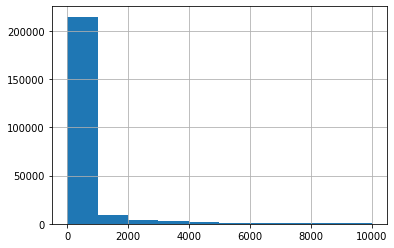

In [15]:
imdb[imdb.votes < 10000].votes.hist()

A very unequal distribution.



Lets take a look at the year column:

In [16]:
imdb.year.describe()

count    244791.000000
mean       1991.428529
std          25.532860
min        1894.000000
25%        1975.000000
50%        2001.000000
75%        2012.000000
max        2020.000000
Name: year, dtype: float64

50% of the movies in the database are from the past 20 years. Even though this could indicate that the same amount of movies have been made in the past 20 years than the last century, it might be a bit early to generalize this to the entire movie industry, as our dataframe only includes movies that have a rating on the IMDB database

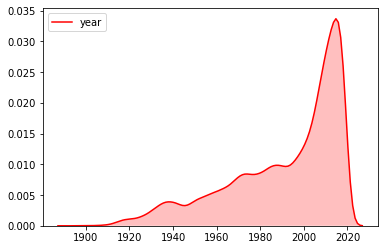

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

sns.kdeplot(imdb.year,shade=True, ax=ax1,color='r')

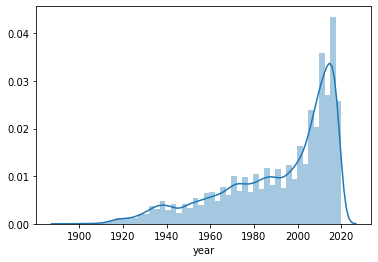

In [18]:
sns.distplot(imdb.year)

In those plots we can visualize the year distribution, with a clear boom after the year 2000. 

To analyse the ratings I will only include those titles that have more than 10 votes. As we could see by the voting distribution we will lose a considerable amount of movies from our dataframe, however I believe that including titles with less than 10 votes would result in biased information.

In [19]:
imdb_votes = imdb[imdb.votes > 10].copy()
imdb_votes.shape

(199712, 8)

We lost around 44,000 movies from our dataframe, which I think is an acceptable trade-off.

# Average rating by decade


We will visualize average rating by decade and find out which decade is considered to have produced the best movies according to IMDB users.

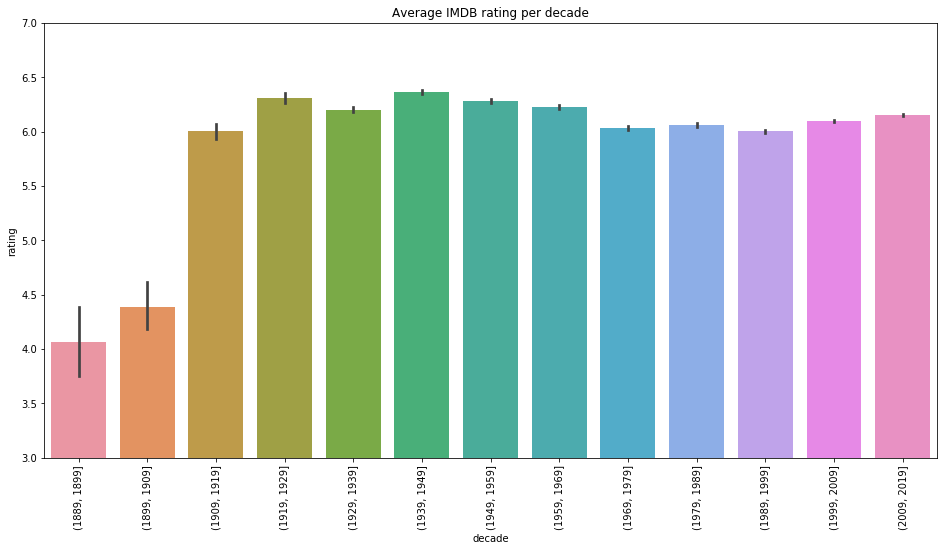

In [20]:
interval_range = pd.interval_range(start=1889, freq=10, end=2020)
imdb_votes['decade'] = pd.cut(imdb_votes.year, bins=interval_range)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)

plt.title('Average IMDB rating per decade')
plt.rcParams.update({'font.size': 15})
plt.xticks(rotation=90)
ax.set_ylim(3,7)





sns.barplot(x='decade',y='rating', data=imdb_votes)

In [21]:
imdb_votes.rating.describe()

count    199712.000000
mean          6.130504
std           1.295504
min           1.000000
25%           5.400000
50%           6.300000
75%           7.000000
max          10.000000
Name: rating, dtype: float64

As we can see most decades have an average rating close to the mean rating of the entire dataset.

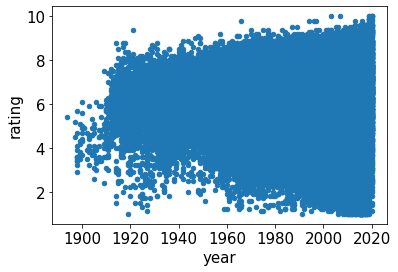

In [22]:
imdb_votes.plot.scatter(x='year',y='rating')

The scatter plot indicates a bigger dispersion of rating values towards the recent years, with values for old movies being closer to the average rating.

# Votes by year

Lets take a look at the vote distribution per year:

In [23]:
year = imdb_votes.groupby('year',as_index=False).mean()

In [24]:
year

,year,duration_minutes,rating,votes
0,1894.0,45.000000,5.400000,87.000000
1,1897.0,20.000000,4.850000,179.000000
2,1898.0,1.000000,3.800000,20.666667
3,1899.0,135.000000,4.100000,25.000000
4,1900.0,NaN,4.777778,23.000000
...,...,...,...,...
120,2016.0,95.679994,6.149573,3841.843060
121,2017.0,96.387124,6.189039,3216.364972
122,2018.0,97.717730,6.124074,2845.964639
123,2019.0,102.270070,6.286022,2546.162255


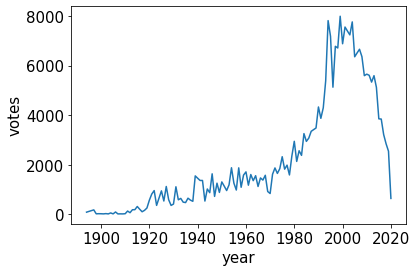

In [25]:
sns.lineplot(x='year',y='votes',data=year)

As is expected modern movies are much more popular between the IMDB userbase.

# Analysis per movie genres

Some titles have several genres in the same column and in the same row, which makes data analysis impossible. 

A possible to solution to this problem is to explode each title in several rows, each row containing only one genre:

In [26]:
imdb_votes['genres'].value_counts()

Drama                            33330
Comedy                           18609
Documentary                      15175
Comedy,Drama                      7144
Drama,Romance                     6486
                                 ...  
Action,Documentary,War               1
Comedy,Documentary,Reality-TV        1
Comedy,Drama,Game-Show               1
Family,Mystery,Sport                 1
Action,Musical,Sci-Fi                1
Name: genres, Length: 1207, dtype: int64

As we can see there is 1207 different combinations of movie genres, an unworkable amount.

Lets proceed to explode each title with more than one genre in several rows:

In [27]:
split = imdb_votes['genres'].str.split(',').apply(pd.Series, 1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres'
del imdb_votes['genres']
imdb_votes = imdb_votes.join(split)

In [28]:
imdb_votes.genres.value_counts()

Drama          92566
Comedy         54705
Romance        24462
Documentary    24221
Action         23229
Crime          18628
Thriller       17853
Horror         15304
Adventure      13988
Mystery         8047
Family          7984
Fantasy         6316
Biography       6078
History         5518
Sci-Fi          5423
Music           4980
Musical         4694
War             4621
Animation       3579
Western         3387
Adult           2473
Sport           2428
Film-Noir        778
News             480
Reality-TV        22
Short              3
Game-Show          2
Talk-Show          1
Name: genres, dtype: int64

The result is 26 movie genres. Lets group the dataframe by movie genre:

In [29]:
genres = imdb_votes.groupby('genres',as_index=False).mean()

We will drop some categories like 'game-show' and 'news' that have very few values and dont seem relevant to our analysis.

In [30]:
genres.drop([12,19,18,1,24,11,22],inplace=True)
genres


,genres,year,duration_minutes,rating,votes
0,Action,1990.862241,101.581182,5.691209,10670.014336
2,Adventure,1981.270303,94.249791,5.899264,14810.327781
3,Animation,2002.967868,84.344929,6.334786,12675.459626
4,Biography,2000.182297,99.383246,6.932099,8527.045903
5,Comedy,1990.474929,95.032643,5.912366,4344.755690
6,Crime,1986.419422,96.723241,6.028199,7734.350333
7,Documentary,2006.570373,87.660654,7.225342,400.361959
8,Drama,1990.696325,99.777331,6.282177,4285.740261
9,Family,1995.484218,94.614414,6.187475,5062.606338
10,Fantasy,1994.056365,95.784838,5.883486,12533.715168


Sorting by rating:

In [31]:
genres.sort_values('rating',inplace=True)

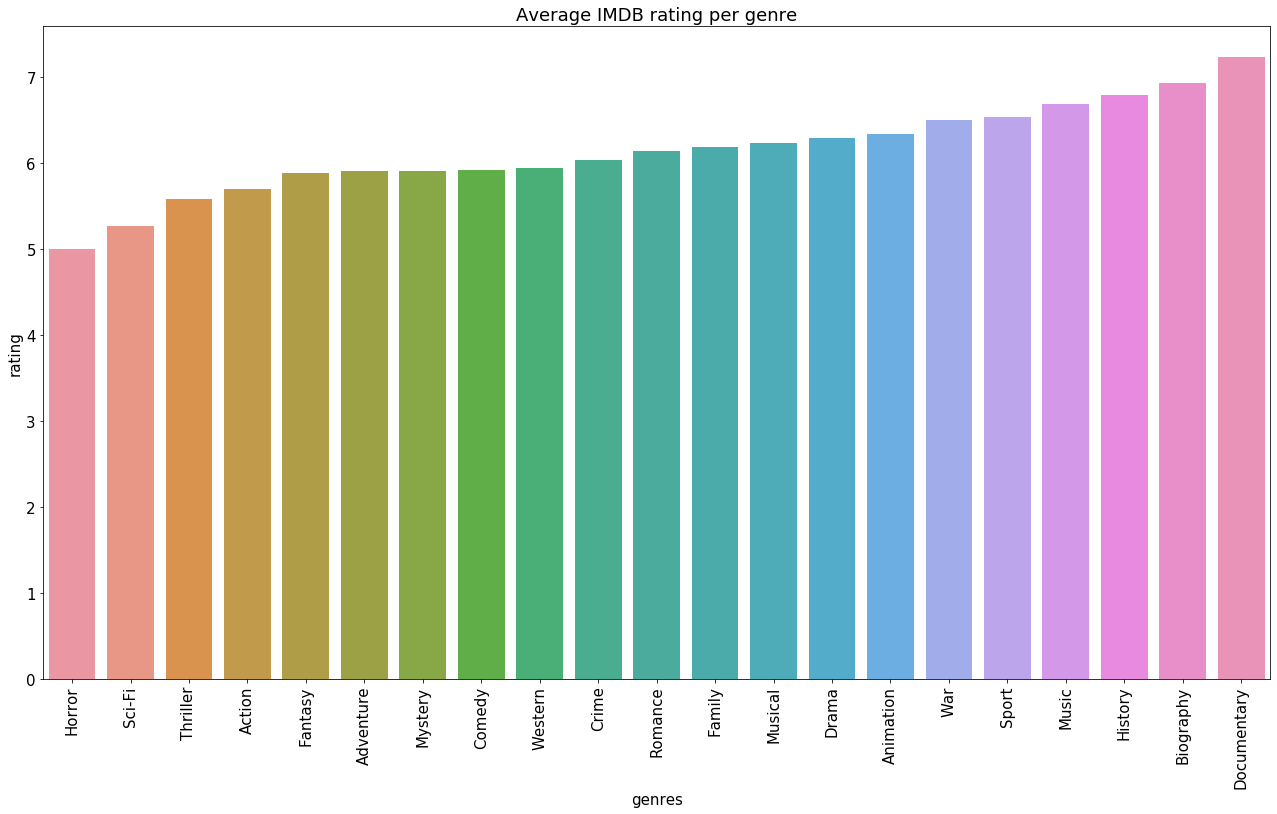

In [32]:
fig = plt.figure(figsize=(22,12))
ax = fig.add_subplot(1, 1, 1)
plt.title('Average IMDB rating per genre')
plt.rcParams.update({'font.size': 18})
plt.xticks(rotation=90)


sns.barplot(x='genres',y='rating', data=genres)

Here we can see the average rating of each genre. At the bottom is horror with a 5 average rating, and at the top documentary with a 7.



Lets take a look at the average year per genre.

In [33]:
genres.sort_values('year',inplace=True)

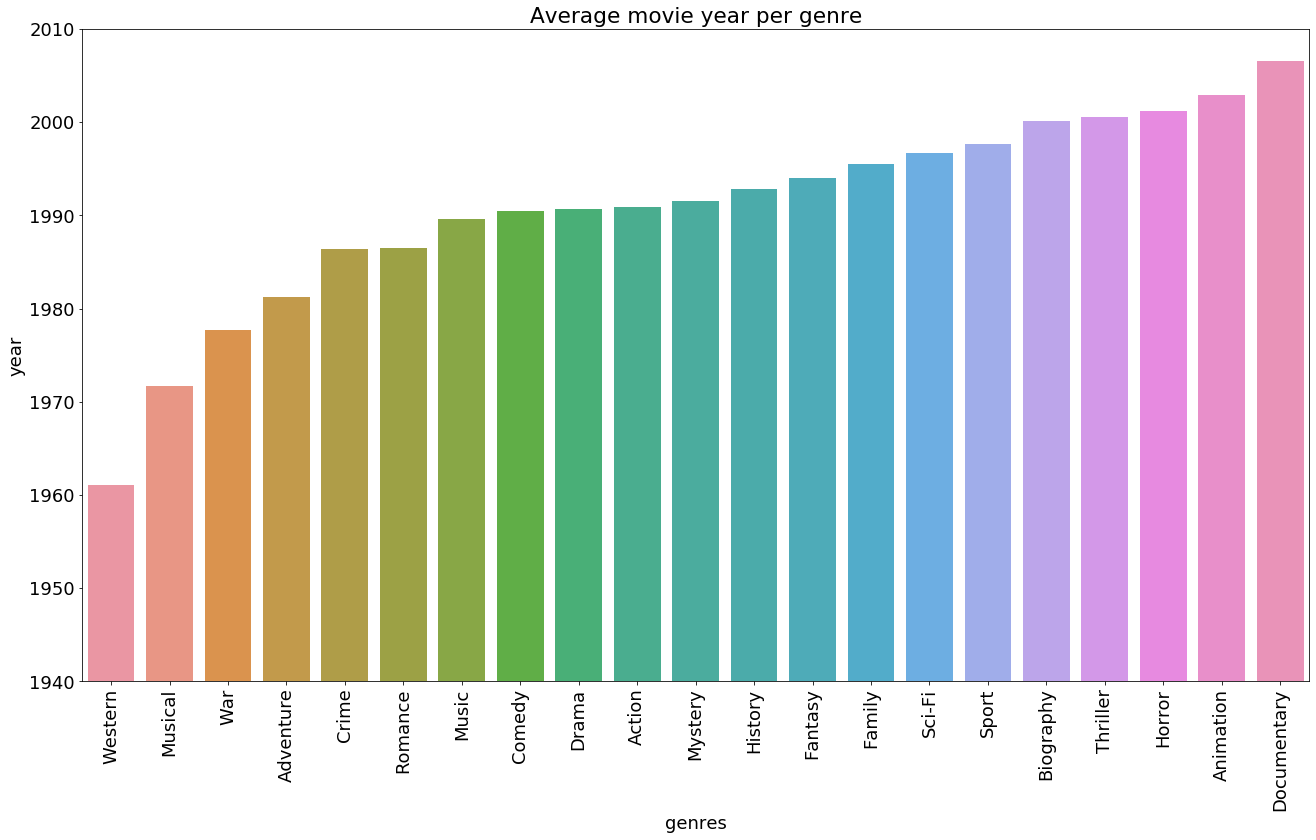

In [34]:
fig = plt.figure(figsize=(22,12))
ax = fig.add_subplot(1, 1, 1)
plt.title('Average movie year per genre')
plt.rcParams.update({'font.size': 18})
plt.xticks(rotation=90)
ax.set_ylim(1940,2010)


sns.barplot(x='genres',y='year', data=genres)

Some intuitive results: genres like western and musical are no longer as popular, while animation and documentary are relatively young



Lets take a look at the average duration per genre:

In [35]:
genres.groupby('genres',as_index=False).mean()
genres.sort_values('duration_minutes',inplace=True)

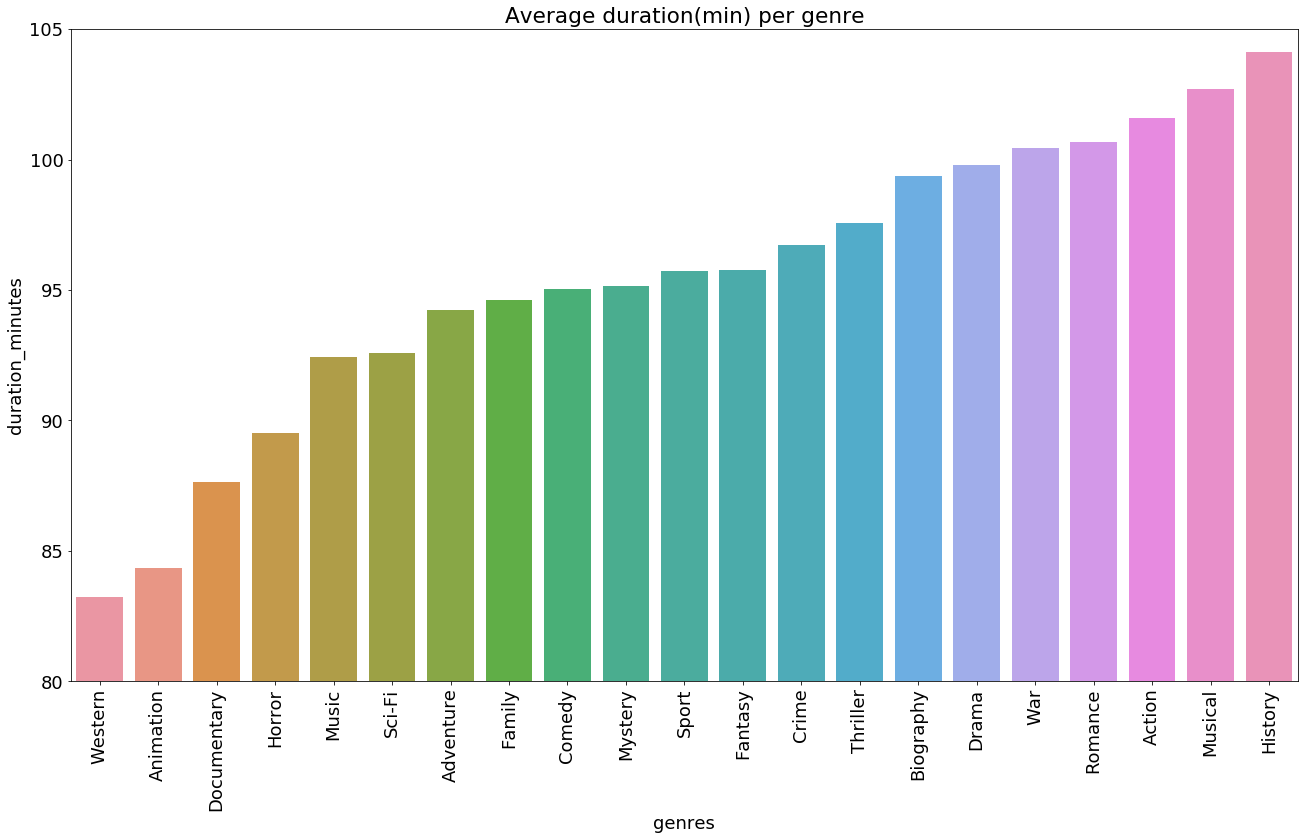

In [36]:
fig = plt.figure(figsize=(22,12))
ax = fig.add_subplot(1, 1, 1)
plt.title('Average duration(min) per genre')
plt.rcParams.update({'font.size': 18})
plt.xticks(rotation=90)
ax.set_ylim(80,105)


sns.barplot(x='genres',y='duration_minutes', data=genres)

History movies are on average 20 minutes longer than animation and western movies.
